# HATE SPEECH DETECTION

## DATA PREPROCESSING 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

In [3]:
from fastai.nlp import *
from sklearn.linear_model import LogisticRegression

In [4]:
import pandas as pd
import numpy as np

In [5]:
data_train = pd.read_csv('/home/spriyanshu723/prince/toxic/train_toxic.csv')
data_test = pd.read_csv('/home/spriyanshu723/prince/toxic/test_toxic.csv')

In [6]:
data_train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [7]:
data_test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [8]:
data_train.shape

(159571, 8)

In [9]:
data_train = data_train.drop(['id'], axis=1)

In [10]:
data_test = data_test.drop(['id'], axis=1)

In [11]:
data_train.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [13]:
data_train['comment_text'][0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [14]:
lens = data_train.comment_text.str.len()
lens.mean(), lens.std(), lens.max()

(394.0732213246768, 590.7202819048919, 5000)

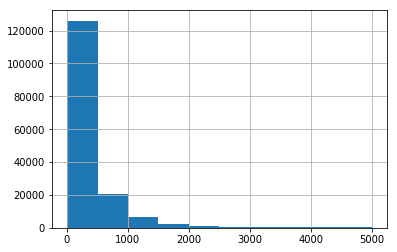

In [15]:
lens.hist();

In [16]:
COMMENT = 'comment_text'
data_train[COMMENT].fillna("unknown", inplace=True)
data_test[COMMENT].fillna("unknown", inplace=True)

In [17]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 7 columns):
comment_text     159571 non-null object
toxic            159571 non-null int64
severe_toxic     159571 non-null int64
obscene          159571 non-null int64
threat           159571 non-null int64
insult           159571 non-null int64
identity_hate    159571 non-null int64
dtypes: int64(6), object(1)
memory usage: 8.5+ MB


In [18]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 1 columns):
comment_text    153164 non-null object
dtypes: object(1)
memory usage: 1.2+ MB


In [19]:
data_train.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [20]:
#data_train = data_train.drop(['none'], axis=1)

In [21]:
#data_train.head()

In [22]:
from sklearn.utils import shuffle
data_train = shuffle(data_train)

In [23]:
data_train.head(20)

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
132617,"Kind of like that, but one table is hidden lik...",0,0,0,0,0,0
138968,Hundreds of books written about ethnic conflic...,0,0,0,0,0,0
52247,"""\n\n LGBT WikiProject Newsletter \n\n{|\n| co...",0,0,0,0,0,0
119632,Check out the voting at WP:LOTD. The winners ...,0,0,0,0,0,0
90894,"""Considering what that user has said to me, I'...",0,0,0,0,0,0
60577,"N.B. Neil\n\nNeil, please note that your threa...",0,0,0,0,0,0
41399,There's no proof that Suzetta Minet is Debi Ma...,0,0,0,0,0,0
13693,Use Higgs particle to decay protons? \n\nNow t...,0,0,0,0,0,0
124285,""" November 2010 (UTC)\nI understand Eliot Frei...",0,0,0,0,0,0
104067,"Yes, it was from days ago. I did it now becaus...",0,0,0,0,0,0


In [24]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159571 entries, 132617 to 102243
Data columns (total 7 columns):
comment_text     159571 non-null object
toxic            159571 non-null int64
severe_toxic     159571 non-null int64
obscene          159571 non-null int64
threat           159571 non-null int64
insult           159571 non-null int64
identity_hate    159571 non-null int64
dtypes: int64(6), object(1)
memory usage: 9.7+ MB


In [25]:
data_train.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
data_train['class'] = data_train['toxic'] + data_train['severe_toxic'] + data_train['obscene'] + data_train['threat'] + data_train['insult'] + data_train['identity_hate']

In [27]:
data_train.head(20)

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,class
132617,"Kind of like that, but one table is hidden lik...",0,0,0,0,0,0,0
138968,Hundreds of books written about ethnic conflic...,0,0,0,0,0,0,0
52247,"""\n\n LGBT WikiProject Newsletter \n\n{|\n| co...",0,0,0,0,0,0,0
119632,Check out the voting at WP:LOTD. The winners ...,0,0,0,0,0,0,0
90894,"""Considering what that user has said to me, I'...",0,0,0,0,0,0,0
60577,"N.B. Neil\n\nNeil, please note that your threa...",0,0,0,0,0,0,0
41399,There's no proof that Suzetta Minet is Debi Ma...,0,0,0,0,0,0,0
13693,Use Higgs particle to decay protons? \n\nNow t...,0,0,0,0,0,0,0
124285,""" November 2010 (UTC)\nI understand Eliot Frei...",0,0,0,0,0,0,0
104067,"Yes, it was from days ago. I did it now becaus...",0,0,0,0,0,0,0


In [28]:
data_train.shape

(159571, 8)

In [29]:
data_tmp = data_train.loc[data_train['class'] > 0]
data_tmp.shape

(16225, 8)

In [30]:
data_tmp.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,class
69030,12th Doctor \n\nLOOK! I HAVE HAD ENOUGH YOU SU...,1,0,0,0,0,0,1
140030,Grandma Terri Should Burn in Trash \nGrandma T...,1,0,0,0,0,0,1
139824,you should just die in a hole while the ideiot...,1,0,0,1,1,0,3
93983,SHE IS SUCH A WHORE!!!!!!!!!!!!!!!!!!!!!!!,1,1,1,0,1,0,4
8031,THE PERSON WHOSE EDITS YOU REVERTED \n\nHY. \n...,1,0,1,0,1,0,3


In [31]:
data_tmp['class'] = 1

/home/spriyanshu723/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [32]:
data_tmp.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,class
69030,12th Doctor \n\nLOOK! I HAVE HAD ENOUGH YOU SU...,1,0,0,0,0,0,1
140030,Grandma Terri Should Burn in Trash \nGrandma T...,1,0,0,0,0,0,1
139824,you should just die in a hole while the ideiot...,1,0,0,1,1,0,1
93983,SHE IS SUCH A WHORE!!!!!!!!!!!!!!!!!!!!!!!,1,1,1,0,1,0,1
8031,THE PERSON WHOSE EDITS YOU REVERTED \n\nHY. \n...,1,0,1,0,1,0,1


In [33]:
data_tmp_o = data_train.loc[data_train['class'] == 0]
data_tmp_o.shape

(143346, 8)

In [34]:
143346 + 16225

159571

In [35]:
data_tmp_o.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,class
132617,"Kind of like that, but one table is hidden lik...",0,0,0,0,0,0,0
138968,Hundreds of books written about ethnic conflic...,0,0,0,0,0,0,0
52247,"""\n\n LGBT WikiProject Newsletter \n\n{|\n| co...",0,0,0,0,0,0,0
119632,Check out the voting at WP:LOTD. The winners ...,0,0,0,0,0,0,0
90894,"""Considering what that user has said to me, I'...",0,0,0,0,0,0,0


In [36]:
dataframe = [data_tmp, data_tmp_o]
data = pd.concat(dataframe)

In [37]:
data = shuffle(data)
data.head(20)

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,class
18840,Season Numbering \n\nI made some changes to th...,0,0,0,0,0,0,0
115334,What this is \nHi. This is my sandbit. Sort ...,0,0,0,0,0,0,0
71676,"""\nYes it is. Thank you so much for your help....",0,0,0,0,0,0,0
58520,"""\n\nThat would be ideal if this were a huge, ...",0,0,0,0,0,0,0
832,What else specifically do you want to know,0,0,0,0,0,0,0
24095,Merging Successful\nThe project of merging six...,0,0,0,0,0,0,0
154050,OK I will start formulating my unblock request...,0,0,0,0,0,0,0
121516,how big is the ass of salafis \n\ni wonder as ...,1,0,1,0,1,1,1
3003,Thankyou SOOO much. I was not expecting this b...,0,0,0,0,0,0,0
104345,"""\nPlease sign your comments so that it is cle...",0,0,0,0,0,0,0


In [38]:
data = data.drop(['toxic'], axis=1)
data = data.drop(['severe_toxic'], axis=1)
data = data.drop(['obscene'], axis=1)
data = data.drop(['threat'], axis=1)
data = data.drop(['insult'], axis=1)
data = data.drop(['identity_hate'], axis=1)

In [39]:
data.head(20)

,comment_text,class
18840,Season Numbering \n\nI made some changes to th...,0
115334,What this is \nHi. This is my sandbit. Sort ...,0
71676,"""\nYes it is. Thank you so much for your help....",0
58520,"""\n\nThat would be ideal if this were a huge, ...",0
832,What else specifically do you want to know,0
24095,Merging Successful\nThe project of merging six...,0
154050,OK I will start formulating my unblock request...,0
121516,how big is the ass of salafis \n\ni wonder as ...,1
3003,Thankyou SOOO much. I was not expecting this b...,0
104345,"""\nPlease sign your comments so that it is cle...",0


In [40]:
data = shuffle(data)
data.head(10)

,comment_text,class
42283,"""\n\nPlease, if you choose to """"correct"""" info...",0
54236,Unspecified source for Image:Andymoses.gif\n\n...,0
98450,British 50th (Northumbrian) Infantry Division\...,0
103028,Se WP:RS for more details. Thank you for your ...,0
59084,"""This article has some strange POV problems. ...",0
142390,"""\n\nYou are a plagiarizing, lying, full-of-sh...",1
32715,I refer to specific work that I do that has no...,0
147019,"""\nAt the top of this section Funkynusayri sai...",0
98,"Thanks much - however, if it's been resolved, ...",0
91305,"dear editor, \n\nyou said that SPB is equally...",0


In [41]:
COMMENT = 'comment_text'
data[COMMENT].fillna("unknown", inplace=True)
data_test[COMMENT].fillna("unknown", inplace=True)

In [42]:
data_test.head()

,comment_text
0,Yo bitch Ja Rule is more succesful then you'll...
1,== From RfC == \n\n The title is fine as it is...
2,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,":If you have a look back at the source, the in..."
4,I don't anonymously edit articles at all.


In [43]:
data.head()

,comment_text,class
42283,"""\n\nPlease, if you choose to """"correct"""" info...",0
54236,Unspecified source for Image:Andymoses.gif\n\n...,0
98450,British 50th (Northumbrian) Infantry Division\...,0
103028,Se WP:RS for more details. Thank you for your ...,0
59084,"""This article has some strange POV problems. ...",0


In [44]:
data.shape

(159571, 2)

In [45]:
df = data['comment_text']
df.head()

42283     "\n\nPlease, if you choose to ""correct"" info...
54236     Unspecified source for Image:Andymoses.gif\n\n...
98450     British 50th (Northumbrian) Infantry Division\...
103028    Se WP:RS for more details. Thank you for your ...
59084     "This article has some strange POV problems.  ...
Name: comment_text, dtype: object

In [46]:
df.shape

(159571,)

In [47]:
y = data['class']

In [48]:
y = y.to_numpy()

In [49]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [50]:
type(y)

numpy.ndarray

In [51]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_valid = 4571  
n_trn = len(df)-n_valid
raw_train, raw_valid = split_vals(data, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((155000,), (155000,), (4571,), (4571,))

In [52]:
X_train.head()

42283     "\n\nPlease, if you choose to ""correct"" info...
54236     Unspecified source for Image:Andymoses.gif\n\n...
98450     British 50th (Northumbrian) Infantry Division\...
103028    Se WP:RS for more details. Thank you for your ...
59084     "This article has some strange POV problems.  ...
Name: comment_text, dtype: object

In [53]:
X_valid.head()

108492    Recording odors \nWill we be able to record od...
30210     The main page of the article on User:Thirteen ...
72396     But given the power of television these days, ...
61058     "Nobody's could be called homophobic, even emp...
110116    "\nWelcome!\n\nHello, , and welcome to Wikiped...
Name: comment_text, dtype: object

In [54]:
y_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [55]:
y_valid

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### MODEL DEPLOYMENT 

In [56]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [57]:
import nltk
from nltk.tokenize import TweetTokenizer 
from nltk.stem.wordnet import WordNetLemmatizer 
lem = WordNetLemmatizer()
tokenizer=TweetTokenizer()

In [58]:
n = X_train.shape[0]
vec = TfidfVectorizer(ngram_range=(1,2), tokenizer=tokenize,
               min_df=3, max_df=0.9, strip_accents='unicode', use_idf=1,
               smooth_idf=1, sublinear_tf=1 )
trn_term_doc = vec.fit_transform(X_train)
test_term_doc = vec.transform(X_valid)

In [59]:
trn_term_doc, test_term_doc

(<155000x416730 sparse matrix of type '<class 'numpy.float64'>'
 	with 17264793 stored elements in Compressed Sparse Row format>,
 <4571x416730 sparse matrix of type '<class 'numpy.float64'>'
 	with 482149 stored elements in Compressed Sparse Row format>)

In [60]:
trn_doc = trn_term_doc
val_doc = test_term_doc

In [61]:
trn_doc[0]

<1x416730 sparse matrix of type '<class 'numpy.float64'>'
	with 181 stored elements in Compressed Sparse Row format>

In [62]:
vocab = vec.get_feature_names()

In [63]:
vocab[5000:5010]

['" software',
 '" soil',
 '" solar',
 '" sold',
 '" soldier',
 '" soldiers',
 '" sole',
 '" solid',
 '" solo',
 '" solution']

In [64]:
w = set([o.lower() for o in X_train[0].split(' ')])

In [65]:
len(w)

40

### NAIVE BAYES 

In [66]:
x = trn_doc
x

<155000x416730 sparse matrix of type '<class 'numpy.float64'>'
	with 17264793 stored elements in Compressed Sparse Row format>

In [67]:
type(y_train)

numpy.ndarray

In [68]:
y = y_train

In [69]:
y.shape

(155000,)

In [70]:
p = x[y==1].sum(0)+1
q = x[y==0].sum(0)+1

In [71]:
p

matrix([[440.33391, 296.06566,  22.5396 , ...,   1.     ,   1.     ,   1.     ]])

In [72]:
p.shape

(1, 416730)

In [73]:
q

matrix([[1231.73209,  328.91057,  158.77762, ...,    1.23762,    4.05021,    4.05021]])

In [74]:
q.shape

(1, 416730)

In [75]:
r = np.log((p/p.sum())/(q/q.sum()))

In [76]:
r

matrix([[ 0.10339,  1.02683, -0.8202 , ...,  0.91884, -0.26674, -0.26674]])

In [77]:
r.shape

(1, 416730)

In [78]:
b = np.log(len(p)/len(q))

In [79]:
b

0.0

In [80]:
type(y_valid)

numpy.ndarray

In [81]:
y_valid.shape

(4571,)

In [82]:
val_y = y_valid.reshape(1, 4571)
val_y.shape

(1, 4571)

In [83]:
pre_preds = val_doc @ r.T + b
preds = pre_preds.T>0
(preds==val_y).mean()

0.9306497484139138

In [84]:
pre_preds = val_doc.sign() @ r.T + b
preds = pre_preds.T > 0
(preds==val_y).mean()

0.9188361408882083

### LOGISTIC REGRESSION 

In [85]:
x

<155000x416730 sparse matrix of type '<class 'numpy.float64'>'
	with 17264793 stored elements in Compressed Sparse Row format>

In [86]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [87]:
m = LogisticRegression(C=1e8, dual=True)
m.fit(x, y)
preds = m.predict(val_doc)
(preds==val_y).mean()

/home/spriyanshu723/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/spriyanshu723/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9610588492671188

In [88]:
m = LogisticRegression(C=1e8, dual=True)
m.fit(trn_doc.sign(), y)
preds = m.predict(val_doc.sign())
(preds==val_y).mean()

/home/spriyanshu723/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9544957339750602

In [89]:
m = LogisticRegression(C=0.1, dual=True)
m.fit(trn_doc, y)
preds = m.predict(val_doc)
(preds==val_y).mean()

0.923211551082914

In [90]:
m = LogisticRegression(C=0.1, dual=True)
m.fit(trn_doc.sign(), y)
preds = m.predict(val_doc.sign())
(preds==val_y).mean()

/home/spriyanshu723/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9529643404069131

### TRI-GRAM MODEL DEPLOYMENT 

In [91]:
n = X_train.shape[0]
vect = TfidfVectorizer(ngram_range=(1,4), tokenizer=tokenize,
               min_df=3, max_df=0.9, strip_accents='unicode', use_idf=1,
               smooth_idf=1, sublinear_tf=1 )
trn_term_doc = vect.fit_transform(X_train)
test_term_doc = vect.transform(X_valid)

In [92]:
trn_doc = trn_term_doc

In [93]:
val_doc = test_term_doc

In [94]:
trn_doc.shape

(155000, 1312223)

In [95]:
vocab = vect.get_feature_names()

In [96]:
vocab[20000:20005]

['" concept .',
 '" concept from',
 '" concept from the',
 '" concepts',
 '" concern']

In [97]:
y = y_train
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [98]:
val_y

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [99]:
x = trn_doc.sign()
x

<155000x1312223 sparse matrix of type '<class 'numpy.float64'>'
	with 27291023 stored elements in Compressed Sparse Row format>

In [100]:
val_x = val_doc.sign()
val_x

<4571x1312223 sparse matrix of type '<class 'numpy.float64'>'
	with 736242 stored elements in Compressed Sparse Row format>

In [101]:
p = x[y==1].sum(0)+1
q = x[y==0].sum(0)+1
r = np.log((p/p.sum())/(q/q.sum()))
b = np.log(len(p)/len(q))

In [102]:
pre_preds = val_x @ r.T + b
preds = pre_preds.T>0
(preds==val_y).mean()

0.9162108947713848

In [103]:
m = LogisticRegression(C=0.1, dual=True)
m.fit(x,y)
preds = m.predict(val_x)
(preds==val_y).mean()

/home/spriyanshu723/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9547145044847954

In [104]:
r.shape

(1, 1312223)

In [105]:
r

matrix([[ 0.68914,  1.76645,  1.9748 , ...,  0.77421, -0.67271, -0.67271]])

In [106]:
np.exp(r)

matrix([[1.99201, 5.85004, 7.2052 , ..., 2.16888, 0.51032, 0.51032]])

In [107]:
x_nb = x.multiply(r)
m = LogisticRegression(C=0.1, dual=True)
m.fit(x_nb,y)

val_x_nb = val_x.multiply(r)
preds = m.predict(val_x_nb)
(preds==val_y).mean()

/home/spriyanshu723/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9623714723255306

## RETRIVING TOP WORDS FROM HATE DATASET

In [108]:
data.head()

,comment_text,class
42283,"""\n\nPlease, if you choose to """"correct"""" info...",0
54236,Unspecified source for Image:Andymoses.gif\n\n...,0
98450,British 50th (Northumbrian) Infantry Division\...,0
103028,Se WP:RS for more details. Thank you for your ...,0
59084,"""This article has some strange POV problems. ...",0


In [109]:
data.shape

(159571, 2)

In [111]:
data = shuffle(data)
data.head(20)

,comment_text,class
153999,Blocking \n\n |action = deauto\n |friendly =...,0
66363,[edit: neither lede nor body],0
122255,Until you learn to stop being dishonest you sh...,0
144318,"""\n\nJesus and Messianic Prophecy\nHey, you re...",0
29011,I give up. The user who has nominated it for d...,0
126254,Saosin addition \n\nso i added the information...,0
107386,Censorship \n\nWhy was the censorship section ...,0
77053,"In all seriousness, seek third-party resolutio...",0
135840,"""\n\nWhat's missing: evidence that these criti...",0
100329,"""\n\n Please do not vandalize pages, as you di...",0


In [112]:
data_hate_two = data.loc[data['class'] == 1]

In [113]:
data_hate_two.head()

,comment_text,class
158323,Fuck off you cunt. I know a LOT more about Fly...,1
110055,this person is a communist and should be taken...,1
51983,http://www.thirdworldtraveler.com/Blum/Greece_...,1
54175,""" \n\nfor example, if i were to say that you a...",1
37057,Wikipieda has hurt my friends and caused them ...,1


In [114]:
data_hate_two.shape

(16225, 2)

In [115]:
data_unhate_two = data.loc[data['class'] == 0]
data_unhate_two.head()

,comment_text,class
153999,Blocking \n\n |action = deauto\n |friendly =...,0
66363,[edit: neither lede nor body],0
122255,Until you learn to stop being dishonest you sh...,0
144318,"""\n\nJesus and Messianic Prophecy\nHey, you re...",0
29011,I give up. The user who has nominated it for d...,0


In [116]:
data_unhate_two.shape

(143346, 2)

In [117]:
143346+16225

159571

In [118]:
with open('a_hate_two', 'wb') as fp:
    pickle.dump(data_hate_two, fp)

In [119]:
with open('a_unhate_two', 'wb') as fp:
    pickle.dump(data_unhate_two, fp)

In [120]:
hate_df = data_hate_two['comment_text']
hate_df.head()

158323    Fuck off you cunt. I know a LOT more about Fly...
110055    this person is a communist and should be taken...
51983     http://www.thirdworldtraveler.com/Blum/Greece_...
54175     " \n\nfor example, if i were to say that you a...
37057     Wikipieda has hurt my friends and caused them ...
Name: comment_text, dtype: object

In [121]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [122]:
one = TfidfVectorizer(ngram_range=(1,3), tokenizer=tokenize,
               min_df=3, max_df=0.9, strip_accents='unicode', use_idf=1,
               smooth_idf=1, sublinear_tf=1 )

In [123]:
one

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.9, max_features=None, min_df=3,
        ngram_range=(1, 3), norm='l2', preprocessor=None, smooth_idf=1,
        stop_words=None, strip_accents='unicode', sublinear_tf=1,
        token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=<function tokenize at 0x7f620dbc19d8>, use_idf=1,
        vocabulary=None)

In [124]:
trn_term_doc = one.fit_transform(hate_df)

In [125]:
trn_term_doc

<16225x87684 sparse matrix of type '<class 'numpy.float64'>'
	with 1342235 stored elements in Compressed Sparse Row format>

In [126]:
indices_hate = np.argsort(one.idf_)[::-1]
features_hate = one.get_feature_names()
top_n = 100
top_features_hate = [features_hate[i] for i in indices_hate[:top_n]]
print(top_features_hate)

['insulting me ,', 'aids ?', 'nonetheless ,', 'aint you ,', 'air !', 'none of them', 'air ,', 'none are', 'airbus', 'none ,', 'aired', 'airplane', 'non of', 'non - white', 'airport and then', 'nomination of', 'airport earlier', 'airport earlier in', 'airports', 'aint you', 'aint shit', 'nonsense . "', 'aids would', 'normal life', 'normal and', 'aids less', 'nor i', 'nor has', 'aids less aids', 'nor did', 'noone likes', 'nonsense at', 'aids would be', 'noobs .', 'noob !', 'nonsense you', 'nonsense on', 'nonsense it', 'nonsense into', 'nod', 'nocal', 'airways', 'no sense !', 'no the', 'akkadian and', 'akkadian and in', 'no special', 'no sources', 'no social', 'no shame', 'al . ,', 'no wait', 'no self', 'alan ,', 'alas', 'no reliable', 'no references ,', 'no reference', 'no reason whatsoever', 'akkadian', 'no warning', 'nobody has talked', 'akerans ,', 'akbar !', 'nobody cares about', "nobody ' s", "nobody '", 'akbar ! !', 'akerans', 'noah', 'no worries', 'akin to', 'no work in', 'no word

### SAVING TOP WORDS FROM HATE DATASET 

In [127]:
indices_hate = np.argsort(one.idf_)[::-1]
features_hate = one.get_feature_names()
top_n = 5000
top_features_hate = [features_hate[i] for i in indices_hate[:top_n]]

In [128]:
with open('z_hate_two', 'wb') as fp:
    pickle.dump(top_features_hate, fp)

## RETRIVING TOP DATA FROM UNHATE DATASET 

In [129]:
data_unhate_two.head()

,comment_text,class
153999,Blocking \n\n |action = deauto\n |friendly =...,0
66363,[edit: neither lede nor body],0
122255,Until you learn to stop being dishonest you sh...,0
144318,"""\n\nJesus and Messianic Prophecy\nHey, you re...",0
29011,I give up. The user who has nominated it for d...,0


In [130]:
unhate_df = data_unhate_two['comment_text']
unhate_df.head()

153999    Blocking \n\n |action   = deauto\n |friendly =...
66363                         [edit: neither lede nor body]
122255    Until you learn to stop being dishonest you sh...
144318    "\n\nJesus and Messianic Prophecy\nHey, you re...
29011     I give up. The user who has nominated it for d...
Name: comment_text, dtype: object

In [131]:
trn_term_doc = one.fit_transform(unhate_df)

In [133]:
trn_term_doc

<143346x894852 sparse matrix of type '<class 'numpy.float64'>'
	with 22781559 stored elements in Compressed Sparse Row format>

In [134]:
indices_unhate = np.argsort(one.idf_)[::-1]
features_unhate = one.get_feature_names()
top_n = 100
top_features_unhate = [features_unhate[i] for i in indices_unhate[:top_n]]
print(top_features_unhate)

['actually represents', 'shutting the', 'shuttle ,', 'shuttle astronauts', 'shuttle system', 'shutup', ', dancing', 'shy ,', 'hiding all', 'hiding ,', 'hideyoshi', 'hideliho !', 'shyamal', 'shyamal ,', 'hideliho', 'hidebound', 'shylock in', ', dangerous', 'shutting down the', 'shut him', ', daniel o', 'shut it .', 'hiding their', 'shut me down', 'hiding that', 'shut people', 'hiding place and', 'shut up !', 'hiding information', 'hiding in the', 'hiding behind this', 'shut your', 'hiding behind me', 'shutdown of', 'shuts', '1px # bfb1a3', 'hide who', 'hide what', 'si -', 'si /', 'hide behind his', ', dan .', 'sic !', '1rr .', 'hide a', 'sic ) ,', 'hide -', 'sic ?', 'sic ? )', ', damiens', 'hidding', 'hiddenstructure', 'sic ] .', 'sice', 'hidden under the', 'siblings and', 'hide behind rules', ', dana', 'hide information', 'si ?', 'si in', 'si vous', 'hide on', 'siafu', '1rr ,', 'siao', 'hide behind their', 'siao -', 'siao - yue', 'siberia and', 'siberian ,', 'sibi', 'sibiu', 'hiding th

### SAVING TOP WORDS FROM UNHATE DATASET 

In [135]:
indices_unhate = np.argsort(one.idf_)[::-1]
features_unhate = one.get_feature_names()
top_n = 5000
top_features_unhate = [features_unhate[i] for i in indices_unhate[:top_n]]

In [136]:
with open('z_unhate_two', 'wb') as fp:
    pickle.dump(top_features_unhate, fp)